Find out the following: \
a. The number of rides between Uber and Lyft, and type \
b. The price of rides between... \
c. The price distance correlation \
d. The price location correlation \
e. Merge both datasets \
f. Cheapest option during price surge
g. Prediction model based on a certain weather on a certain location

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [53]:
df_uber = pd.read_csv(r"C:\Users\melli\OneDrive\Desktop\Python Portfolio\5. Uber Lyfts Analysis\cab_rides.csv")
df_uber

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693068,1.00,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [59]:
df_uber.isnull().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
dtype: int64

In [58]:
df_uber = df_uber.dropna(axis=0).reset_index(drop=True)
df_uber.isnull().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
dtype: int64

In [77]:
df_type = df_uber['cab_type'].value_counts().to_frame()
df_type

,cab_type
Uber,330568
Lyft,307408


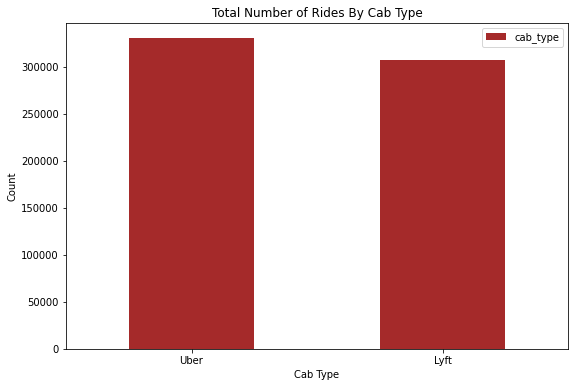

In [78]:
df_type.plot(kind='bar', y = 'cab_type', figsize=(9, 6), color = 'brown')
plt.title('Total Number of Rides By Cab Type')
plt.xticks(rotation='horizontal')
plt.xlabel('Cab Type')
plt.ylabel('Count')
plt.show()

In [87]:
price = df_uber.groupby('cab_type').sum()['price']
price

cab_type
Lyft    5333957.98
Uber    5221435.00
Name: price, dtype: float64

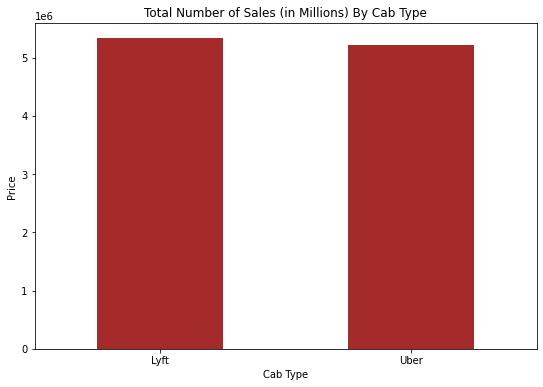

In [96]:
price.plot(kind='bar', y = 'cab_type', figsize=(9, 6), color = 'brown')
plt.title('Total Number of Sales (in Millions) By Cab Type')
plt.xticks(rotation='horizontal')
plt.xlabel('Cab Type')
plt.ylabel('Price')
plt.show()

In [98]:
name = df_uber.groupby('name').sum()['price']
name

name
Black           1130758.00
Black SUV       1668679.50
Lux              910509.50
Lux Black       1181605.55
Lux Black XL    1656124.55
Lyft             492413.68
Lyft XL          784375.20
Shared           308929.50
UberPool         482184.00
UberX            537997.00
UberXL           863803.00
WAV              538013.50
Name: price, dtype: float64

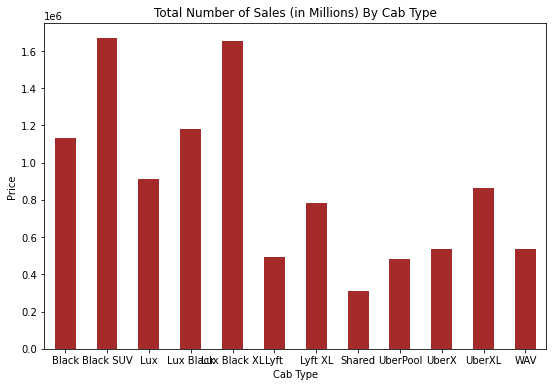

In [99]:
name.plot(kind='bar', y = 'cab_type', figsize=(9, 6), color = 'brown')
plt.title('Total Number of Sales (in Millions) By Cab Type')
plt.xticks(rotation='horizontal')
plt.xlabel('Cab Type')
plt.ylabel('Price')
plt.show()

In [105]:
plotPerColumnDistribution(df1, 10, 5)

NameError: name 'plotPerColumnDistribution' is not defined

In [49]:
df_weather = pd.read_csv(r"C:\Users\melli\OneDrive\Desktop\Python Portfolio\5. Uber Lyfts Analysis\weather.csv")
df_weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [46]:
df_uber['destination'].unique()

array(['North Station', 'Northeastern University', 'West End',
       'Haymarket Square', 'South Station', 'Fenway', 'Theatre District',
       'Beacon Hill', 'Back Bay', 'North End', 'Financial District',
       'Boston University'], dtype=object)

In [47]:
df_weather['location'].unique()

array(['Back Bay', 'Beacon Hill', 'Boston University', 'Fenway',
       'Financial District', 'Haymarket Square', 'North End',
       'North Station', 'Northeastern University', 'South Station',
       'Theatre District', 'West End'], dtype=object)

In [43]:
df_uber

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693068,1.00,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [26]:
df_uber.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [27]:
df_weather.isnull().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

In [28]:
df_uber.info

<bound method DataFrame.info of         distance cab_type     time_stamp    destination            source  \
0           0.44     Lyft  1544952607890  North Station  Haymarket Square   
1           0.44     Lyft  1543284023677  North Station  Haymarket Square   
2           0.44     Lyft  1543366822198  North Station  Haymarket Square   
3           0.44     Lyft  1543553582749  North Station  Haymarket Square   
4           0.44     Lyft  1543463360223  North Station  Haymarket Square   
...          ...      ...            ...            ...               ...   
693066      1.00     Uber  1543708385534      North End          West End   
693067      1.00     Uber  1543708385534      North End          West End   
693068      1.00     Uber  1543708385534      North End          West End   
693069      1.00     Uber  1543708385534      North End          West End   
693070      1.00     Uber  1543708385534      North End          West End   

        price  surge_multiplier            

In [29]:
df = df_weather.merge(df_uber, on='time_stamp', how='left')
df.isnull().sum()


temp                   0
location               0
clouds                 0
pressure               0
rain                5382
time_stamp             0
humidity               0
wind                   0
distance            6276
cab_type            6276
destination         6276
source              6276
price               6276
surge_multiplier    6276
id                  6276
product_id          6276
name                6276
dtype: int64